# MNIST Original Hand-Written Images

In [2]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
train=pd.read_csv('../static/data/mnist_train.csv', header=0, index_col=None)
train.shape

(60000, 785)

In [5]:
train.head(2)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    train.iloc[:, 1:], train.label, stratify=train.label, test_size=0.25, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45000, 784), (15000, 784), (45000,), (15000,))

In [17]:
df_test = pd.DataFrame(X_test, columns=test.columns)
df_test['target'] = y_test
df_test.to_csv('../static/data/mnist_test.csv', index=False)

NameError: name 'test' is not defined

In [9]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [10]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((45000, 784), (15000, 784))

In [11]:
joblib.dump(scaler, '../static/model/mnist_scaler.pkl')

['../static/model/mnist_scaler.pkl']

In [12]:
sv_clf = SVC()
sv_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [13]:
params = {
    #'C': [0.1, 1, 10]
    'C': [5, 10, 20]
}

In [14]:
grid_cv = GridSearchCV(sv_clf, param_grid=params, scoring='accuracy', cv=5, 
                       verbose=1)
grid_cv.fit(X_train_scaled, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 52.4min finished
최고 평균 정확도: 0.9815
최적 파라미터: {'C': 10}


In [15]:
best_sv = grid_cv.best_estimator_
pred = best_sv.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9817333333333333

In [16]:
joblib.dump(best_sv, '../static/model/mnist_sv.pkl')

['../static/model/mnist_sv.pkl']

### TEST

In [19]:
scaler = joblib.load('../static/model/mnist_scaler.pkl')
best_sv = joblib.load('../static/model/mnist_sv.pkl')

In [20]:
index = 900
test_data = X_test.iloc[index:index+3, :].values
test_data.shape

(3, 784)

In [21]:
test_scaled = scaler.transform(test_data)

In [22]:
label_list = y_test[index:index+3]
label_list

52050    8
27321    7
43026    4
Name: label, dtype: int64

In [23]:
pred_sv = best_sv.predict(test_scaled)
pred_sv

array([8, 7, 4], dtype=int64)

- 시각화하기

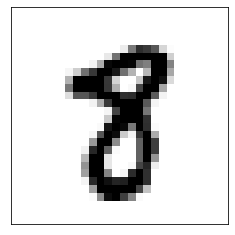

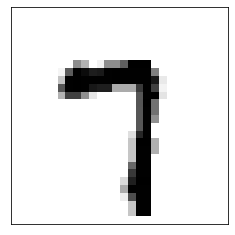

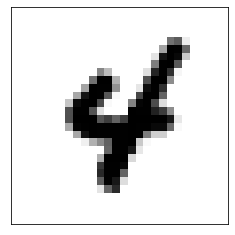

In [24]:
for i in range(3):
    digit = test_data[i].reshape(28,28)
    plt.figure(figsize=(4,4))
    plt.xticks([]); plt.yticks([])
    plt.imshow(digit, cmap=plt.cm.binary, interpolation='nearest')

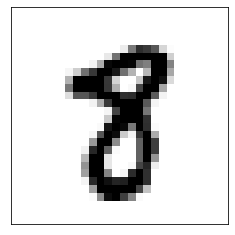

In [25]:
plt.figure(figsize=(4,4))
plt.xticks([]); plt.yticks([])
plt.imshow(test_data[0].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
plt.show()

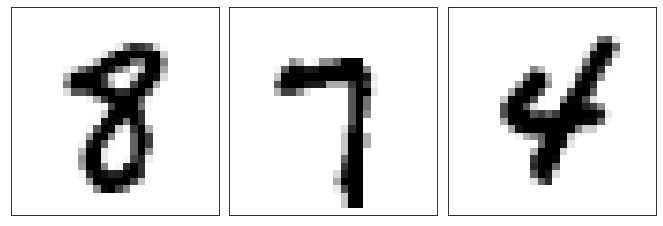

In [26]:
fig = plt.figure(figsize=(12, 4))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(3):
    ax = fig.add_subplot(1, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(test_data[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')